# 特徵處理

當然除了這些還有其他方法, 參考 012.特徵相關.

1. PCA : 降維
    ```python
    from sklearn.decomposition import PCA

    # 创建PCA对象，并拟合数据
    pca = PCA()
    pca.fit(data) # 只有特徵值
    ```
---
2. AutoFeat : 升維
    ```python
    from autofeat import AutoFeatRegressor

    # 建立 AutoFeatRegressor 物件
    reg = AutoFeatRegressor()

    # 使用 fit 函數進行特徵提升
    X_transformed = reg.fit_transform(X, y)
    ```
---
3. RFE : 刪除不重要的特徵
    ```python
    from sklearn.feature_selection import RFE
    # 使用 RFE 進行特徵選擇，選擇2個特徵
    rfe = RFE(model, n_features_to_select=2)
    X_selected = rfe.fit_transform(X, y)
    ```
---
4. SelectKBest : 根據指定的統計測試方法選擇得分最高的 k 個特徵。
    ```python
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression   # 假設使用 f_regression 統計測試方法

    # 假設 k = 5
    k = 5
    selector = SelectKBest(score_func=f_regression, k=k)

    # 使用 SelectKBest 選擇 k 個最佳特徵
    X_new = selector.fit_transform(X, y)
    ```
---
5. SelectPercentile : 根據指定的評分函數選擇特定百分比的特徵。
    ```python
    from sklearn.feature_selection import SelectPercentile
    from sklearn.feature_selection import mutual_info_classif   # 假設使用 mutual_info_classif 評分函數

    # 假設選擇 30% 的特徵
    percentile = 30
    selector = SelectPercentile(score_func=mutual_info_classif, percentile=percentile)

    # 使用 SelectPercentile 選擇指定百分比的特徵
    X_new = selector.fit_transform(X, y)
    ```
---
6. SelectFromModel :  根據模型中的特徵重要性或係數，選擇在設定的閾值以上的特徵。這使得 SelectFromModel 可以根據模型的特徵重要性自動選擇最佳的特徵子集。
    ```python
    from sklearn.feature_selection import SelectFromModel
    # 初始化 SelectFromModel 並使用 RandomForestClassifier 作為模型
    selector = SelectFromModel(estimator = model)
    ```
---
7. VarianceThreshold : 用於特徵選擇的類別，它可以用來過濾掉低方差的特徵。
    ```python
    from sklearn.feature_selection import VarianceThreshold
    # 初始化 VarianceThreshold 並設定閾值為0.1
    selector = VarianceThreshold(threshold=0.1)
    # 使用 VarianceThreshold 過濾低方差特徵
    X_filtered = selector.fit_transform(X)
    ```
---
8. Boruta : 是一種特徵選擇算法，用於挑選最重要的特徵，特別適用於處理高維數據的特徵選擇。它基於隨機森林的概念，通過比較原始特徵和隨機產生的特徵的重要性，來判斷哪些特徵對於目標變量的預測最有貢獻。
    ```python
    from boruta import BorutaPy
    # 建立隨機森林迴歸模型
    rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
    # 初始化 Boruta
    boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=42)
    # 擬合 Boruta 模型
    boruta_selector.fit(X.values, y.values)
    ```

## 篩選特徵時常用的評分函數

1. mutual_info_classif：

    * 優點：計算特徵和目標之間的互信息，對於特徵和類別目標的關聯性較好。
    * 缺點：只能處理類別目標，無法處理連續目標。
---
2. mutual_info_regression：

    * 優點：計算特徵和目標之間的互信息，對於特徵和連續目標的關聯性較好。
    * 缺點：只能處理連續目標，無法處理類別目標。
---
3. f_classif：

    * 優點：計算ANOVA F-statistic和p-value，對於特徵和類別目標的關聯性進行評估。
    * 缺點：只能處理類別目標，無法處理連續目標。
---
4. f_regression：

    * 優點：計算ANOVA F-statistic和p-value，對於特徵和連續目標的關聯性進行評估。
    * 缺點：只能處理連續目標，無法處理類別目標。

## PCA(主成分分析) : 降維

用來降低維度, 且保留數據的主要訊息.

In [25]:
import numpy as np
from sklearn.decomposition import PCA

# 生成示例数据
np.random.seed(42)
data = np.random.rand(100, 10)

# 创建PCA对象，并拟合数据
pca = PCA()
pca.fit(data)

# 获取每个维度的解释度和累计方差解释率
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print("每个维度的主成分(PC)值 : ")
for i in range(min(3,np.shape(data)[1])):
    print(f"维度 {i+1}: {pca.components_[i]}")

# 输出每个维度的解释度和累计方差解释率
print("\n每個维度的解釋度 : ")
for i, ev in enumerate(explained_variance):
    print(f"维度 {i+1}: {ev:.4f}")

print("\n累積方差解釋率 : ")
for i, cev in enumerate(cumulative_explained_variance):
    print(f"前 {i+1} 個维度累積方差解釋率：{cev:.4f}")

每个维度的主成分(PC)值 : 
维度 1: [-0.31644095  0.38832581  0.37263919 -0.08200572 -0.3611503   0.14104365
 -0.24575502  0.08832903  0.48643738  0.38515135]
维度 2: [-0.04233586  0.2798924   0.31062378 -0.14507819 -0.15805849 -0.49418697
 -0.18461535  0.45284893 -0.50331272 -0.20162139]
维度 3: [-0.02214896  0.37802299  0.11591659  0.36181336  0.59020145  0.2330573
 -0.49203875 -0.16012417 -0.20412184  0.014192  ]

每個维度的解釋度 : 
维度 1: 0.1611
维度 2: 0.1390
维度 3: 0.1180
维度 4: 0.1063
维度 5: 0.0968
维度 6: 0.0883
维度 7: 0.0859
维度 8: 0.0775
维度 9: 0.0679
维度 10: 0.0593

累積方差解釋率 : 
前 1 個维度累積方差解釋率：0.1611
前 2 個维度累積方差解釋率：0.3001
前 3 個维度累積方差解釋率：0.4181
前 4 個维度累積方差解釋率：0.5244
前 5 個维度累積方差解釋率：0.6212
前 6 個维度累積方差解釋率：0.7095
前 7 個维度累積方差解釋率：0.7953
前 8 個维度累積方差解釋率：0.8728
前 9 個维度累積方差解釋率：0.9407
前 10 個维度累積方差解釋率：1.0000


In [26]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# 生成模拟数据
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# 使用PCA进行降维
pca = PCA()
X_pca = pca.fit_transform(X)

# 計算主成分的解釋度
explained_variance_ratio = pca.explained_variance_ratio_

# 計算累積解釋度
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 找到累积解释方差大于等于0.8的主成分的数量
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.8) + 1 #求累積解釋率 >= 0.8 的位置

# 取出累积解释方差大于等于0.8的主成分
X_pca_selected = X_pca[:, :n_components]

# 使用回归模型进行分析
regression_model = LinearRegression()
regression_model.fit(X_pca_selected, y)

# 输出模型的系数和截距
print("回歸模型系数：", regression_model.coef_)
print("回歸模型截距：", regression_model.intercept_)

回歸模型系数： [-80.06685648  84.98259857  45.76534356 -32.28268893  66.9524704
  68.45640835 -55.75366454]
回歸模型截距： 11.013216414049733


## AutoFeat : 升維

有些資料必須使用高維度去分析, 例如 y = X1^2 + X2^2

In [24]:
import numpy as np
import pandas as pd
from autofeat import AutoFeatRegressor

# 假設這是我們的資料
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 3, 4, 5, 6],
    'y': [5, 13, 25, 41, 61]
})

# 分割特徵和目標變數
X = data[['X1', 'X2']]
y = data['y']

# 建立 AutoFeatRegressor 物件
reg = AutoFeatRegressor()

# 使用 fit 函數進行特徵提升
X_transformed = reg.fit_transform(X, y)

# 取得新特徵名稱
new_feat_names = X_transformed.columns

print("原始資料形狀：", X.shape)
print("特徵提升後資料形狀：", X_transformed.shape)
print("原始特徵名稱：", X.columns)
print("新特徵名稱：", new_feat_names)


原始資料形狀： (5, 2)
特徵提升後資料形狀： (5, 3)
原始特徵名稱： Index(['X1', 'X2'], dtype='object')
新特徵名稱： Index(['X1', 'X2', 'exp(X2)'], dtype='object')


## Recursive Feature Elimination (RFE)：

RFE 是一種特徵選擇方法，它通過反覆選擇模型中最不重要的特徵，然後刪除它們，從而進行特徵選擇。

sklearn.feature_selection.RFE(estimator, n_features_to_select=None, step=1, verbose=0)

* estimator: 指定用於特徵選擇的基模型 (estimator)，這個模型需要實現 coef_ 或者 feature_importances_ 屬性來衡量特徵的重要性。常見的基模型包括線性回歸、SVM、決策樹等。

* n_features_to_select: 指定希望選擇的特徵數量。預設值為 None，表示選擇一半的特徵數量。

* step: 指定每次遞減特徵數量的步長，預設值為 1。如果 step 為整數，則在每次迭代中將刪除 step 個特徵；如果 step 為浮點數(0,1)，則每次迭代中將刪除當前特徵數量的 step 比例。

* verbose: 控制過程是否輸出詳細信息。預設值為 0，表示不輸出詳細信息；如果設置為大於 0 的值，則會輸出相關信息。


### python

RFE 基本使用方法

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 載入 iris 數據集
iris = load_iris()
X, y = iris.data, iris.target

# 建立Logistic回歸模型作為基模型
model = LogisticRegression()

# 使用 RFE 進行特徵選擇，選擇2個特徵
rfe = RFE(model, n_features_to_select=2, verbose = 1)
X_selected = rfe.fit_transform(X, y)

# 印出選擇的特徵
print("選擇的特徵:")
print(X_selected[1:10,:])

Fitting estimator with 4 features.
Fitting estimator with 3 features.
選擇的特徵:
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


特徵數量普查

Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
score =  0.9666666666666667


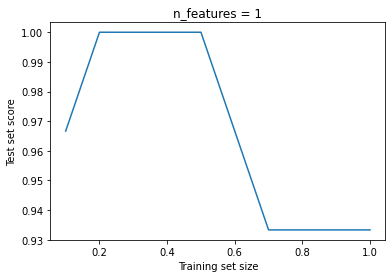

Fitting estimator with 4 features.
Fitting estimator with 3 features.
score =  1.0


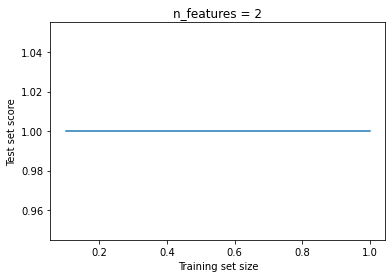

Fitting estimator with 4 features.
score =  1.0


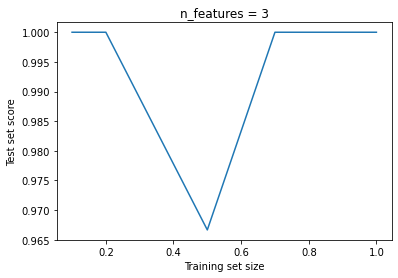

score =  1.0


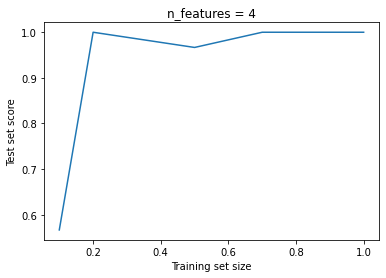

In [50]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier #決策樹
import matplotlib.pyplot as plt

# 載入 iris 數據集
iris = load_iris()
X, y = iris.data, iris.target

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for param_num in range(np.shape(X_train)[1]):
    # 建立決策樹分類器
    decision_tree = DecisionTreeClassifier(random_state=42)

    # 使用 RFE 進行特徵選擇，選擇2個特徵
    rfe = RFE(decision_tree, n_features_to_select = param_num + 1, verbose = 1)

    # 減少 training 特徵數量
    X_selected_train = rfe.fit_transform(X_train, y_train)

    # 減少 test 特徵數量
    X_selected_test = rfe.transform(X_test)

    # 定義超參數網格，這裡我們只調整正則化參數 alpha
    param_grid = {'min_samples_split': range(2, (len(X_selected_train) - 10), 10)}

    # 使用 5-fold 交叉驗證進行網格搜索
    grid_search_model = GridSearchCV(decision_tree, param_grid, cv=5)

    # 求最佳超參數
    grid_search_model.fit(X_selected_train, y_train)

    # 使用最佳超參數 fit model
    grid_search_model.best_estimator_.fit(X_selected_train, y_train) # 正確來說應該去比較所有特徵數量的最佳的cv score 再決定要用哪個model去fit

    # score
    print("score = ", grid_search_model.best_estimator_.score(X_selected_test, y_test))

    # 绘制学习曲线
    ratios = [0.1, 0.2, 0.5, 0.7, 1.0]
    scores = []
    for r in ratios:
        X_sample = X_selected_train[:int(r*len(X_selected_train))]
        y_sample = y_train[:int(r*len(y_train))]
        
        dtc = DecisionTreeClassifier(criterion='entropy') 
        dtc.fit(X_sample, y_sample)
        score = dtc.score(X_selected_test, y_test)
        scores.append(score)

    plt.plot(ratios, scores)
    plt.xlabel('Training set size')
    plt.ylabel('Test set score')
    plt.title('n_features = '+ str(param_num+1))
    plt.show()


## SelectKBest 和 SelectPercentile

兩者方法類似, 前者是選擇特徵數量是使用整數, 後者使用比例

### python

SelectKBest

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression   # 假設使用 f_regression 統計測試方法, 就是ANOVA, y是連續的則轉換成類別(?)
from sklearn.datasets import load_iris

# 載入 iris 數據集
iris = load_iris()
X, y = iris.data, iris.target

# 假設 k = 5
k = 3
selector = SelectKBest(score_func = f_regression, k=k)

# 使用 SelectKBest 選擇 k 個最佳特徵
X_new = selector.fit_transform(X, y)

# 獲取選擇的特徵的索引
selected_feature_indices = selector.get_support(indices=True)

print("選擇的特徵的索引 = ", selected_feature_indices)

選擇的特徵的索引 =  [0 2 3]


SelectPercentile

In [1]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif   # 假設使用 mutual_info_classif 評分函數
from sklearn.datasets import load_iris

# 載入 iris 數據集
iris = load_iris()
X, y = iris.data, iris.target

# 假設選擇 50% 的特徵
percentile = 50
selector = SelectPercentile(score_func=mutual_info_classif, percentile=percentile)

# 使用 SelectPercentile 選擇指定百分比的特徵
X_new = selector.fit_transform(X, y)

# 獲取選擇的特徵的索引
selected_feature_indices = selector.get_support(indices=True)
print("選擇的特徵的索引 = ", selected_feature_indices)

選擇的特徵的索引 =  [2 3]


## SelectFromModel

SelectFromModel 根據模型中的特徵重要性或係數，選擇在設定的閾值以上的特徵。這使得 SelectFromModel 可以根據模型的特徵重要性自動選擇最佳的特徵子集。

SelectFromModel 有幾個重要的參數：

* estimator：指定用於特徵選擇的基礎模型。可以是回歸模型或分類模型，比如 LinearRegression、RandomForestRegressor、LogisticRegression、RandomForestClassifier 等。

* threshold：設定特徵的閾值，只有當特徵重要性或係數大於該閾值時，才會被選擇。默認值為 None，這意味著所有特徵都會被保留。你可以根據需要調整閾值來控制保留的特徵數量。

* prefit：默認為 False，表示 SelectFromModel 會自動擬合模型，並根據模型的特徵重要性或係數選擇特徵。如果將其設置為 True，則需要手動擬合模型，並將已擬合的模型傳遞給 SelectFromModel。

In [9]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 載入 iris 數據集
iris = load_iris()
X, y = iris.data, iris.target

# 初始化 RandomForestClassifier 作為模型
clf = RandomForestClassifier()

# 初始化 SelectFromModel 並使用 RandomForestClassifier 作為模型
selector = SelectFromModel(estimator = clf, threshold = 0.1) # threshold 為閾值

# 使用 SelectFromModel 選擇特徵
X_selected = selector.fit_transform(X, y)

# 打印選擇的特徵
print("原始的特徵數 = ", np.shape(X)[1])
print("修正後的特徵數 = ", np.shape(X_selected)[1])

原始的特徵數 =  4
修正後的特徵數 =  2


## VarianceThreshold

用於特徵選擇的類別，是一种简单的特征选择方法，它根据特征的方差来进行选择, 可以用來過濾掉低方差的特徵。在機器學習中，有些特徵的方差很小，也就是說這些特徵的值在數據中幾乎不變化，對於建模來說並沒有太多信息量，因此可以被視為噪音或冗餘特徵。

參數 :
* threshold：設定方差的閾值，只有當特徵的方差大於該閾值時，才會被保留。預設值為 0，表示所有特徵都會被保留。


### python

VarianceThreshold

In [12]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

# 載入 iris 數據集
iris = load_iris()
X, y = iris.data, iris.target

# 初始化 VarianceThreshold 並設定閾值為0.1
selector = VarianceThreshold(threshold=0.5)

# 使用 VarianceThreshold 過濾低方差特徵
X_filtered = selector.fit_transform(X)

# 打印過濾後的特徵
print(X_filtered[:20])

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]]


# Boruta

是一種特徵選擇算法，用於挑選最重要的特徵，特別適用於處理高維數據的特徵選擇。它基於隨機森林的概念，通過比較原始特徵和隨機產生的特徵的重要性，來判斷哪些特徵對於目標變量的預測最有貢獻。


Boruta 算法的運作過程如下：

1. 創建隨機特徵集：對於每個原始特徵，生成一個對應的隨機特徵，這些隨機特徵的值是原始特徵的隨機排列。

2. 訓練隨機森林模型：使用原始特徵和隨機特徵訓練一個隨機森林模型。

3. 計算特徵重要性：根據隨機森林模型，計算每個原始特徵的重要性分數。

4. 比較重要性：將每個原始特徵的重要性分數與相應的隨機特徵的重要性分數進行比較。

5. 判斷特徵重要性：如果原始特徵的重要性顯著高於隨機特徵的重要性，則保留該特徵；如果原始特徵的重要性與隨機特徵的重要性相當或低於隨機特徵的重要性，則將該特徵標記為不重要。

6. 重複過程：重複上述步驟多次，直到所有特徵都被判斷為重要或不重要。

### python

Boruta

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# 從 CSV 檔案讀取資料
boston_data = pd.read_csv('BostonHousing.csv')

# 分割特徵和目標變數
X = boston_data.drop('medv', axis=1)  # 假設目標變數的欄位名稱為 'target_column'
y = boston_data['medv']

# 建立隨機森林迴歸模型
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)

# 初始化 Boruta
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=42)

# 擬合 Boruta 模型
boruta_selector.fit(X.values, y.values)

# 取得選擇的特徵
selected_features = X.columns[boruta_selector.support_]

print("-"*30)
print("選擇的特徵:")
print(selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: